## Assignment By

* **Muhammad Raaid Khan**
* **PGD Batch-05**

## This is a Multi Class Classification Problem

In [6]:
import os
import warnings
warnings.filterwarnings('ignore')

# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
print(tf.__version__)

2.14.0


In [7]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist

In [8]:
# Verifying that the Data Set has been loaded
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.11/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [9]:
# Load the training and test split of the MNIST dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# There are 60,000 Images in Training Dataset
# There are 10,000 Images in Testing Dataset
# Image Resolution is 28x28

LABEL: 9

IMAGE PIXEL ARRAY:
 [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.

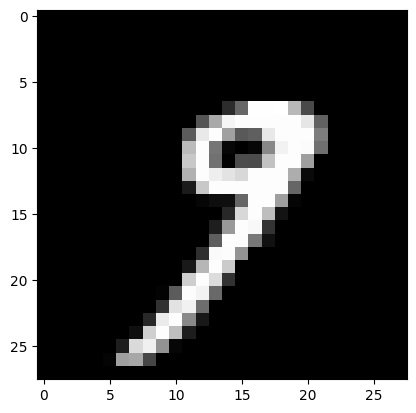

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 33

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')  # Printing Image in form of Array

# Visualize the image
plt.imshow(training_images[index], cmap='gray')
plt.show()

In [11]:
# Normalize the pixel values of the train and test images
# Normalizing in Between 0 and 1
# Pixel Range is 0-255

training_images  = training_images / 255.0
test_images = test_images / 255.0

# Note: Normalization is Very Important as MLPs consider large numbers as weights.

In [15]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),  # Flattening means converting a multi-dimensional input tensor into a one-dimensional tensor while preserving the batch size.
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),    # Hidden Layer: 128 Neurons and ReLU Activation Func.
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Multi Class Classification: Softmax (10 = Number if Classes in Dataset)


# Rule of Thumb: Use (2^x) i.e. 128, 256, 512 etc Number of Neurons in Hidden Layers when Passing Images
# Flatten > Converting Input to Vectors

In [19]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Cross Entropy: for Binary Classification
# Sparse Categorical Cross Entropy: for Multi-Class Classification

model.fit(training_images, training_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0052 - accuracy: 0.9983
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0020 - accuracy: 0.9994
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0048 - accuracy: 0.9984
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9989
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9994
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0035 - accuracy: 0.9988
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0030 - accuracy: 0.9989
Epoch 8/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9993
Epoch 9/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 10/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.003

In [20]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2029 - accuracy: 0.9791


[0.2028951197862625, 0.9790999889373779]

## Test Accuracy = 97%

In [21]:
classifications = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [42]:
image_index = 684
print(classifications[image_index])
print(np.argmax(classifications[image_index ]))

# Probability of class that is the Highest is 

[0.0000000e+00 6.2435183e-12 4.2456800e-06 9.9999547e-01 9.3533335e-14 1.4331814e-23 1.6558306e-29 2.2045747e-07 1.5593619e-25 5.4484150e-27]
3


In [43]:
print(test_labels[image_index])

7


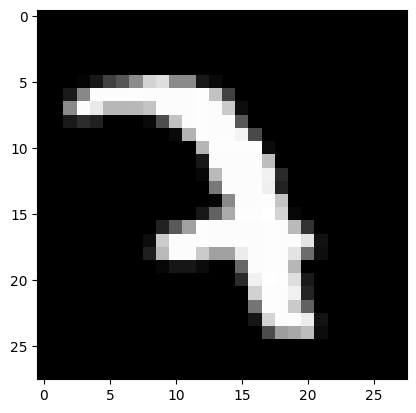

In [44]:
# Visualize the image
plt.imshow(test_images[image_index], cmap='gray')
plt.show()

In [24]:
for i in range(1000):
    output = np.argmax(classifications[i])
    label = test_labels[i]

    if output == label:
        print(f"Image with Label {i} matched")
    else:
        print(f"<Error> Image with Label {i} did not match")


Image with Label 0 matched
Image with Label 1 matched
Image with Label 2 matched
Image with Label 3 matched
Image with Label 4 matched
Image with Label 5 matched
Image with Label 6 matched
Image with Label 7 matched
Image with Label 8 matched
Image with Label 9 matched
Image with Label 10 matched
Image with Label 11 matched
Image with Label 12 matched
Image with Label 13 matched
Image with Label 14 matched
Image with Label 15 matched
Image with Label 16 matched
Image with Label 17 matched
Image with Label 18 matched
Image with Label 19 matched
Image with Label 20 matched
Image with Label 21 matched
Image with Label 22 matched
Image with Label 23 matched
Image with Label 24 matched
Image with Label 25 matched
Image with Label 26 matched
Image with Label 27 matched
Image with Label 28 matched
Image with Label 29 matched
Image with Label 30 matched
Image with Label 31 matched
Image with Label 32 matched
Image with Label 33 matched
Image with Label 34 matched
Image with Label 35 matched
Im